# **Transfer Learning for Colorectal Histology Classification:**

### **Overview**

Colorectal cancer stands as a prominent global malignancy, necessitating proactive diagnostic measures to enhance patient survival rates. A cornerstone of diagnosis involves histopathological examination of tissue samples. Histological slides provide a comprehensive view of tissue micro-architecture, enabling analysis of critical morphological traits requisite for accurate cancer diagnosis and categorization. However, despite its clinical significance, histopathological analysis is time-consuming, labor-intensive, and intrinsically reliant on pathologist proficiency.

The advent of digital pathology, characterized by the digitization of histological slides, has availed vast volumes of histology data amenable to computational scrutiny. This paradigm shift opens the gates for integrating computer vision and machine learning algorithms to complement the acumen of pathologists, expedite the diagnostic process, and potentially amplify diagnostic precision.

### **Project Objective**

The current project endeavored to categorize colorectal cancer histology tiles into eight distinct classes, leveraging a transfer learning strategy underpinned by the EfficientNetB3 model. Transfer learning represents a potent technique in machine learning, where a model pre-trained on a given task serves as a starting point for a related task. This methodology proves particularly effective for training deep learning models in scenarios with limited data availability.

### **Methodology and Rationale**

EfficientNet, a class of state-of-the-art convolutional neural networks, is renowned for its high computational economy coupled with substantial accuracy. Within this family, EfficientNetB4 offers an optimal balance between accuracy and model size. Given the computational intensity inherent in analyzing high-resolution histology slides, EfficientNetB4 serves as an appropriate choice for this project.

### **Applications and Implications**

The intersection of machine learning and medical image analysis, including histology, has garnered significant attention as an emerging field. This project not only serves as an intriguing venture for machine learning beginners to dive into real-world applications but also enables intermediates to delve deeper into more complex topics like model optimization, multi-class classification, and machine learning's role in healthcare.

Such projects hold practical implications of profound magnitude. The ability to automate and enhance the process of classifying colorectal cancer histology tiles could equip medical practitioners with the tools to make more accurate and timely decisions, leading to improved patient outcomes. This exemplifies the real-world impact of machine learning, rendering the project academically intriguing and societally valuable.


### Import Libraries & Set up Environment

For consistency & compatibility please install Tensorflow 2.9.1.

In [1]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Att

**pydot** is a Python library used to generate complex oriented and non-oriented graphs. It's an interface to Graphviz, which is an open-source graph visualization software.

[Fine out more about pydot here..](https://tmilan0604.medium.com/visualisation-with-pydot-for-beginners-ca99c9dc530b) - *article by [Milan Thapa](https://tmilan0604.medium.com/)*

In [2]:
!pip install pydot
!pip install graphviz

- **System Libraries**:
    - `os`: Provides a portable way of using operating system dependent functionality.
    - `time`: Provides various time-related functions.
    - `shutil`: Offers a number of high-level operations on files and collections of files.
    - `pathlib`: Provides various classes representing filesystem paths with semantics appropriate for different operating systems.

- **Data Computation Libraries**:
    - `cv2`: OpenCV library, used for real-time computer vision tasks.
    - `numpy`: Fundamental package for scientific computing in Python.
    - `pandas`: Offers data structures and operations for manipulating numerical tables and time series.
    - `seaborn`: Statistical data visualization library based on matplotlib.
    - `matplotlib.pyplot`: Provides a MATLAB-like interface for making plots and charts.
    - `sklearn.model_selection`: Provides functions for splitting datasets.
    - `sklearn.metrics`: Provides functions for model performance metrics, such as a confusion matrix and classification report.

- **Model Creation Libraries**:
    - `tensorflow`: A powerful library for numerical computation, well-suited for large-scale machine learning.
    - `tensorflow.keras`: TensorFlow's implementation of the Keras API specification, a high-level neural networks API.
    - `Sequential`: A linear stack of layers to create a neural network model.
    - `Adam` and `Adamax`: Optimization algorithms to change the attributes of the neural network.
    - `categorical_crossentropy`: A loss function commonly used for multi-class classification problems.
    - `ImageDataGenerator`: Used for real-time data augmentation.
    - `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Activation`, `Dropout`, `BatchNormalization`: Different types of layers for a neural network.
    - `regularizers`: Apply penalties on layer parameters or layer activity during optimization.
    - `plot_model`: A utility to plot a graph of the model and save it as an image.


In [3]:
# system
import os
import time
import shutil
import pathlib
import itertools

# computation & plotting
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Creating functions**

It is required to create a few functions to process our data, plot the training history and view the dataset etc.  

- `define_paths(dir)`: Traverses through a directory, creating and returning two lists: one with the filepaths of all files found in the nested sub-directories, and another with corresponding labels taken from the folder names.

- `define_df(files, classes)`: Accepts a list of file paths and a list of classes, converts these lists into pandas Series objects, then concatenates them into a DataFrame where one column contains file paths and the other column contains corresponding labels.

- `create_df(data_dir)`: Creates dataframes for training, validation, and testing datasets by first calling `define_paths(data_dir)` to get file paths and labels, then `define_df(files, classes)` to convert these lists into a DataFrame. This DataFrame is then split into training, validation, and testing sets, with stratified sampling based on labels.

In [4]:
def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)

        for fold_ in filelist:
            foldpath_ = os.path.join(foldpath, fold_)
            filelist_ = os.listdir(foldpath_)

            for file_ in filelist_:
                fpath = os.path.join(foldpath_, file_)
                filepaths.append(fpath)
                labels.append(fold_)

    return filepaths, labels

def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

def create_df(data_dir):

    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)

    strat = df['labels']
    train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True,
                                          random_state=123, stratify=strat)

    # test dataframe
    strat = dummy_df['labels']
    valid_df, test_df= train_test_split(dummy_df, train_size=0.5, shuffle=True,
                                        random_state=123, stratify=strat)

    return train_df, valid_df, test_df

#### **Create Data for the Model**

- `create_model_data(train_df, valid_df, test_df, batch_size)`: This function prepares the image data for input into the model. It uses the `ImageDataGenerator` function from Keras to convert images into tensors, and to perform data augmentation for the training dataset.

    - **Function Parameters**:
        - `train_df`, `valid_df`, `test_df`: Dataframes containing the file paths and labels for the training, validation, and test sets.
        - `batch_size`: Size of the subsets to use when training the model.

    - **Inside the Function**:
        - `img_size` and `img_shape`: Variables defining the input shape for the model. `img_size` specifies the height and width of the images, while `img_shape` includes the number of channels.
        - Batch size for the test set: Calculated to be less than or equal to 80 and to evenly divide the length of the test dataset.
        - `scalar`: Preprocessing function for `ImageDataGenerator` that returns the input image as it is.
        - `ImageDataGenerator`: Used to preprocess the images, convert them into a format suitable for input into a neural network, and perform data augmentation techniques.
        - `flow_from_dataframe`: Method that outputs a generator yielding batches of images and labels.

    - **Function Returns**:
        - The function returns three generators: `train_gen`, `valid_gen`, and `test_gen` for training, validation, and testing the model.


Note:  test_data is produced from the validation set.

In [5]:
def create_model_data (train_df, valid_df, test_df, batch_size):

    ''' Because the model uses data from the image data generator,
    this function takes the train, validation, and test dataframes
    and fits them into the picture data generator.
    Image data generator converts images into tensors. '''

    img_size = (150, 150)
    channels = 3
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in \
                                  range(1, ts_length + 1) if ts_length%n == 0 \
                                  and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function = scalar,
                                horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function = scalar)

    train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths',
                                           y_col = 'labels',
                                           target_size = img_size,
                                           class_mode = 'categorical',
                                        color_mode = color, shuffle = True,
                                        batch_size = batch_size)

    valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col = 'filepaths',
                                           y_col = 'labels',
                                           target_size = img_size,
                                           class_mode = 'categorical',
                                        color_mode = color, shuffle = True,
                                        batch_size = batch_size)

    test_gen = ts_gen.flow_from_dataframe(test_df, x_col = 'filepaths',
                                          y_col = 'labels',
                                          target_size = img_size,
                                          class_mode = 'categorical',
                                        color_mode = color, shuffle = False,
                                        batch_size = test_batch_size)

    return train_gen, valid_gen, test_gen

#### **Display Samples from Dataset**

- `show_images(gen)`: This function visualizes a sample of images from a generator produced by `ImageDataGenerator`.

    - **Function Parameter**:
        - `gen`: The generator which yields batches of images and labels.

    - **Inside the Function**:
        - `g_dict` and `classes`: Retrieves the class indices from the generator and creates a list of class names.
        - `images, labels = next(gen)`: Extracts one batch of images and labels from the generator.
        - `length` and `sample`: Determines the number of images in the batch and limits the sample size to 25.
        - `plt.figure(figsize= (20, 20))`: Initializes a new matplotlib figure with a specified size.
        - The `for` loop: For each image in the sample, rescales the image, plots it, identifies the class of the image, adds a title with the class name, and turns off the axis.
        - `plt.show()`: Displays the plot.

In [6]:
def show_images(gen):

    g_dict = gen.class_indices
    classes = list(g_dict.keys())
    images, labels = next(gen)

    length = len(labels)
    sample = min(length, 25)

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 150
        plt.imshow((image * 150).astype('uint8'))
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color= 'green', fontsize= 12)
        plt.axis('off')
    plt.show()

#### **Create Callback**

In machine learning parlance, a callback is a sophisticated instrument that offers customization and control over the training procedure during the model's learning phase. It primarily constitutes a function or a collection of functions triggered at specified junctures during the training cycle, typically at the conclusion of each epoch (a complete traversal through the training data).

Callbacks offer a mechanism to scrutinize and subtly manipulate the training process without the necessity for explicit modifications to the training loop. They perform a gamut of tasks encompassing the saving of optimal model weights, logging of metrics, early stopping of training, scheduling learning rates, and visualization of model performance, among others. The versatility of callbacks renders them an indispensable tool for implementing advanced techniques such as model checkpointing, mitigating overfitting, and fine-tuning hyperparameters.

The code defines a custom callback class `MyCallback` for Keras model training, which inherits from `keras.callbacks.Callback`. This class controls the learning rate adjustment and early stopping of training based on training and validation metrics.

- **Class Initialization `__init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch)`:**
    - Initializes the custom callback with model and various hyperparameters such as patience for learning rate reduction and early stopping, threshold for switching monitoring metrics, factor for learning rate reduction, number of batches per epoch, total epochs, and epoch number to ask for stopping training. It also initializes some class variables for internal use.

- **Method `on_train_begin(self, logs= None)`:**
    - At the beginning of the training, asks the user whether to enable interactive early stopping and prints out the header for training log.

- **Method `on_train_end(self, logs= None)`:**
    - At the end of the training, prints out the total elapsed training time and sets the model weights to the best weights found during the training.

- **Method `on_train_batch_end(self, batch, logs= None)`:**
    - At the end of each training batch, prints out the batch number and training accuracy and loss for the batch.

- **Method `on_epoch_begin(self, epoch, logs= None)`:**
    - At the beginning of each epoch, records the start time of the epoch.

- **Method `on_epoch_end(self, epoch, logs= None)`:**
    - At the end of each epoch, it performs several actions:
        - Calculates and prints out various training and validation metrics, current and next learning rates, monitoring metric, percentage improvement of the monitoring metric, and epoch duration.
        - Checks whether the training or validation metric has improved. If so, resets the patience count for learning rate reduction and early stopping and updates the best weights if the monitoring metric has improved.
        - If the monitoring metric has not improved, increases the patience count. If the patience has been exhausted, reduces the learning rate and resets the patience count. If the learning rate has been reduced for a certain number of times (`stop_patience`), stops the training.
        - Optionally, asks the user whether to stop the training or to continue for more epochs.


In [7]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience
        self.stop_patience = stop_patience
        self.threshold = threshold
        self.factor = factor
        self.batches = batches
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch

        # variables
        self.count = 0
        self.stop_count = 0
        self.best_epoch = 1
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr))
        self.highest_tracc = 0.0
        self.lowest_vloss = np.inf
        self.best_weights = self.model.get_weights()
        self.initial_weights = self.model.get_weights()


    def on_train_begin(self, logs= None):
        msg = 'Notification to halt training [y/n]?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()

    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'Training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        self.model.set_weights(self.best_weights)

    def on_train_batch_end(self, batch, logs= None):

        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()

    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        current_lr = lr
        acc = logs.get('accuracy')
        v_acc = logs.get('val_accuracy')
        loss = logs.get('loss')
        v_loss = logs.get('val_loss')

        if acc < self.threshold:
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc

            if acc > self.highest_tracc:
                self.highest_tracc = acc
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1

            else:
                if self.count >= self.patience - 1:
                    lr = lr * self.factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)
                    self.count = 0
                    self.stop_count = self.stop_count + 1
                    self.count = 0
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1
        else:
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss:
                self.lowest_vloss = v_loss
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                self.best_epoch = epoch + 1

            else:
                if self.count >= self.patience - 1:
                    lr = lr * self.factor
                    self.stop_count = self.stop_count + 1
                    self.count = 0
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)

                else:
                    self.count = self.count + 1

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1:
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'Hit H to halt training, or enter an number of epochs to continue training'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'Training has been halted at epoch {epoch + 1}, as requested'
                        print(msg)
                        self.model.stop_training = True #

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' Training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

#### **Plot the Training History**

The function `plot_training(hist)` is used to visualize the training and validation loss and accuracy during the training of a model.

- **Function Parameter**:
    - `hist`: History object that contains the model's loss and accuracy metrics at each epoch.

- **Inside the Function**:
    - `tr_acc`, `tr_loss`, `val_acc`, `val_loss`: Extracts the training accuracy, training loss, validation accuracy, and validation loss respectively from the history object.
    - `index_loss` and `val_lowest`: Identifies the epoch at which the validation loss was the lowest.
    - `index_acc` and `acc_highest`: Identifies the epoch at which the validation accuracy was the highest.
    - `Epochs`: A list of epoch numbers.
    - `loss_label` and `acc_label`: Strings that represent the epoch number with the lowest validation loss and highest validation accuracy respectively.
    - Initializes a matplotlib figure and styles it using the 'ggplot' style.
    - Plots the training and validation loss on the first subplot and annotates the point with the lowest validation loss.
    - Plots the training and validation accuracy on the second subplot and annotates the point with the highest validation accuracy.

In [8]:
def plot_training(hist):

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('ggplot')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'b', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s = 100, c = 'red', label = loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'b', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s = 100, c = 'red', label = acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


#### **Create a Confusion Matrix**

The `plot_confusion_matrix` function is used to visualize a confusion matrix for the results of a classification model.

- **Function Parameters**:
    - `cm`: Confusion matrix array, obtained by using `sklearn.metrics.confusion_matrix`.
    - `classes`: List of labels of the classes.
    - `normalize`: If `True`, the confusion matrix is normalized by row (i.e., by the number of samples in each class).
    - `title`: The title of the confusion matrix plot.
    - `cmap`: The colormap used to color the confusion matrix.

- **Inside the Function**:
    - Initializes a matplotlib figure.
    - Displays the confusion matrix as an image, where the color of each grid cell represents the number of samples.
    - Adds a color bar to the side of the plot, which provides a reference for what the colors in the confusion matrix mean.
    - Sets the ticks and labels on the x and y axes to be the classes.
    - If `normalize` is `True`, normalizes the confusion matrix and prints 'Normalized Confusion Matrix'. Otherwise, prints 'Confusion Matrix, Without Normalization'.
    - Prints the confusion matrix values.
    - Adds the confusion matrix values as text on the cells of the plot.
    - Sets the layout for a tight fit and labels the axes.

In [9]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Reds):

	plt.figure(figsize = (10, 10))
	plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	# to stay consistent with Damirs results
	if normalize:
		cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment = 'center',
		         color = 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

# **Creating the Model**

### **EfficientNet: An Overview**

**EfficientNet** represents a family of [Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) architectures designed with the primary objective of creating a balance between the computational cost and model performance for image recognition tasks. This balance was achieved by systematically scaling up the depth, width, and resolution of the model.

The foundation of EfficientNet is a baseline network called **EfficientNet-B0**, which was developed by applying a conventional compound scaling method. However, to scale up this baseline network, a novel scaling method was introduced which uses a compound coefficient to scale up the depth, width, and resolution of the network simultaneously, instead of doing it arbitrarily.

### **EfficientNet Variants**

Within the EfficientNet family, there are a variety of models, each denoted by a different letter and number, such as "B3" in EfficientNet-B3, "B4" in EfficientNet-B4, and so on. These models have different scaling coefficients, which ultimately determine the model's size and capacity.

### **EfficientNet-B4**

**EfficientNet-B4** is one of the EfficientNet models that has been scaled up from the baseline EfficientNet-B0 using a compound coefficient. It is larger and more powerful compared to its smaller counterparts (for instance, EfficientNet-B3 or EfficientNet-B2) but smaller than the larger variants (like EfficientNet-B5 or EfficientNet-B6).

One of the key advantages of EfficientNet-B4 is that it offers a balance between model size, computational cost, and accuracy. This balance makes EfficientNet-B4 suitable for a variety of image classification tasks where both efficiency and performance are crucial. This model has demonstrated excellent performance in both low- and high-resource settings, showcasing its flexibility and capability across different data regimes.

### **Load Data**

This code is designed to handle the initial data processing and setup required for a machine learning model using TensorFlow/Keras.

- `data_dir`: Specifies the path to the directory containing the data.

- `try-except` block: Captures and handles exceptions during data processing and model setup.

    - **Inside the `try` block**:
    
        - `train_df, valid_df, test_df = create_df(data_dir)`: Calls the `create_df` function using the specified data directory, which returns DataFrames for the training, validation, and testing sets.
        
        - `batch_size = 40`: Sets the batch size for the data generators to 40.
        
        - `train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)`: Calls the `create_model_data` function using the created DataFrames and batch size, which returns generators for the training, validation, and testing sets.

    - **Inside the `except` block**:
    
        - `print('Invalid input')`: Prints an error message if an exception is encountered during the data processing or model setup stages.

In [10]:
data_dir = '/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000'

try:
    # Get splitted data
    train_df, valid_df, test_df = create_df(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid input')

Found 3500 validated image filenames belonging to 8 classes.
Found 750 validated image filenames belonging to 8 classes.
Found 750 validated image filenames belonging to 8 classes.


### **Display Sample Data**

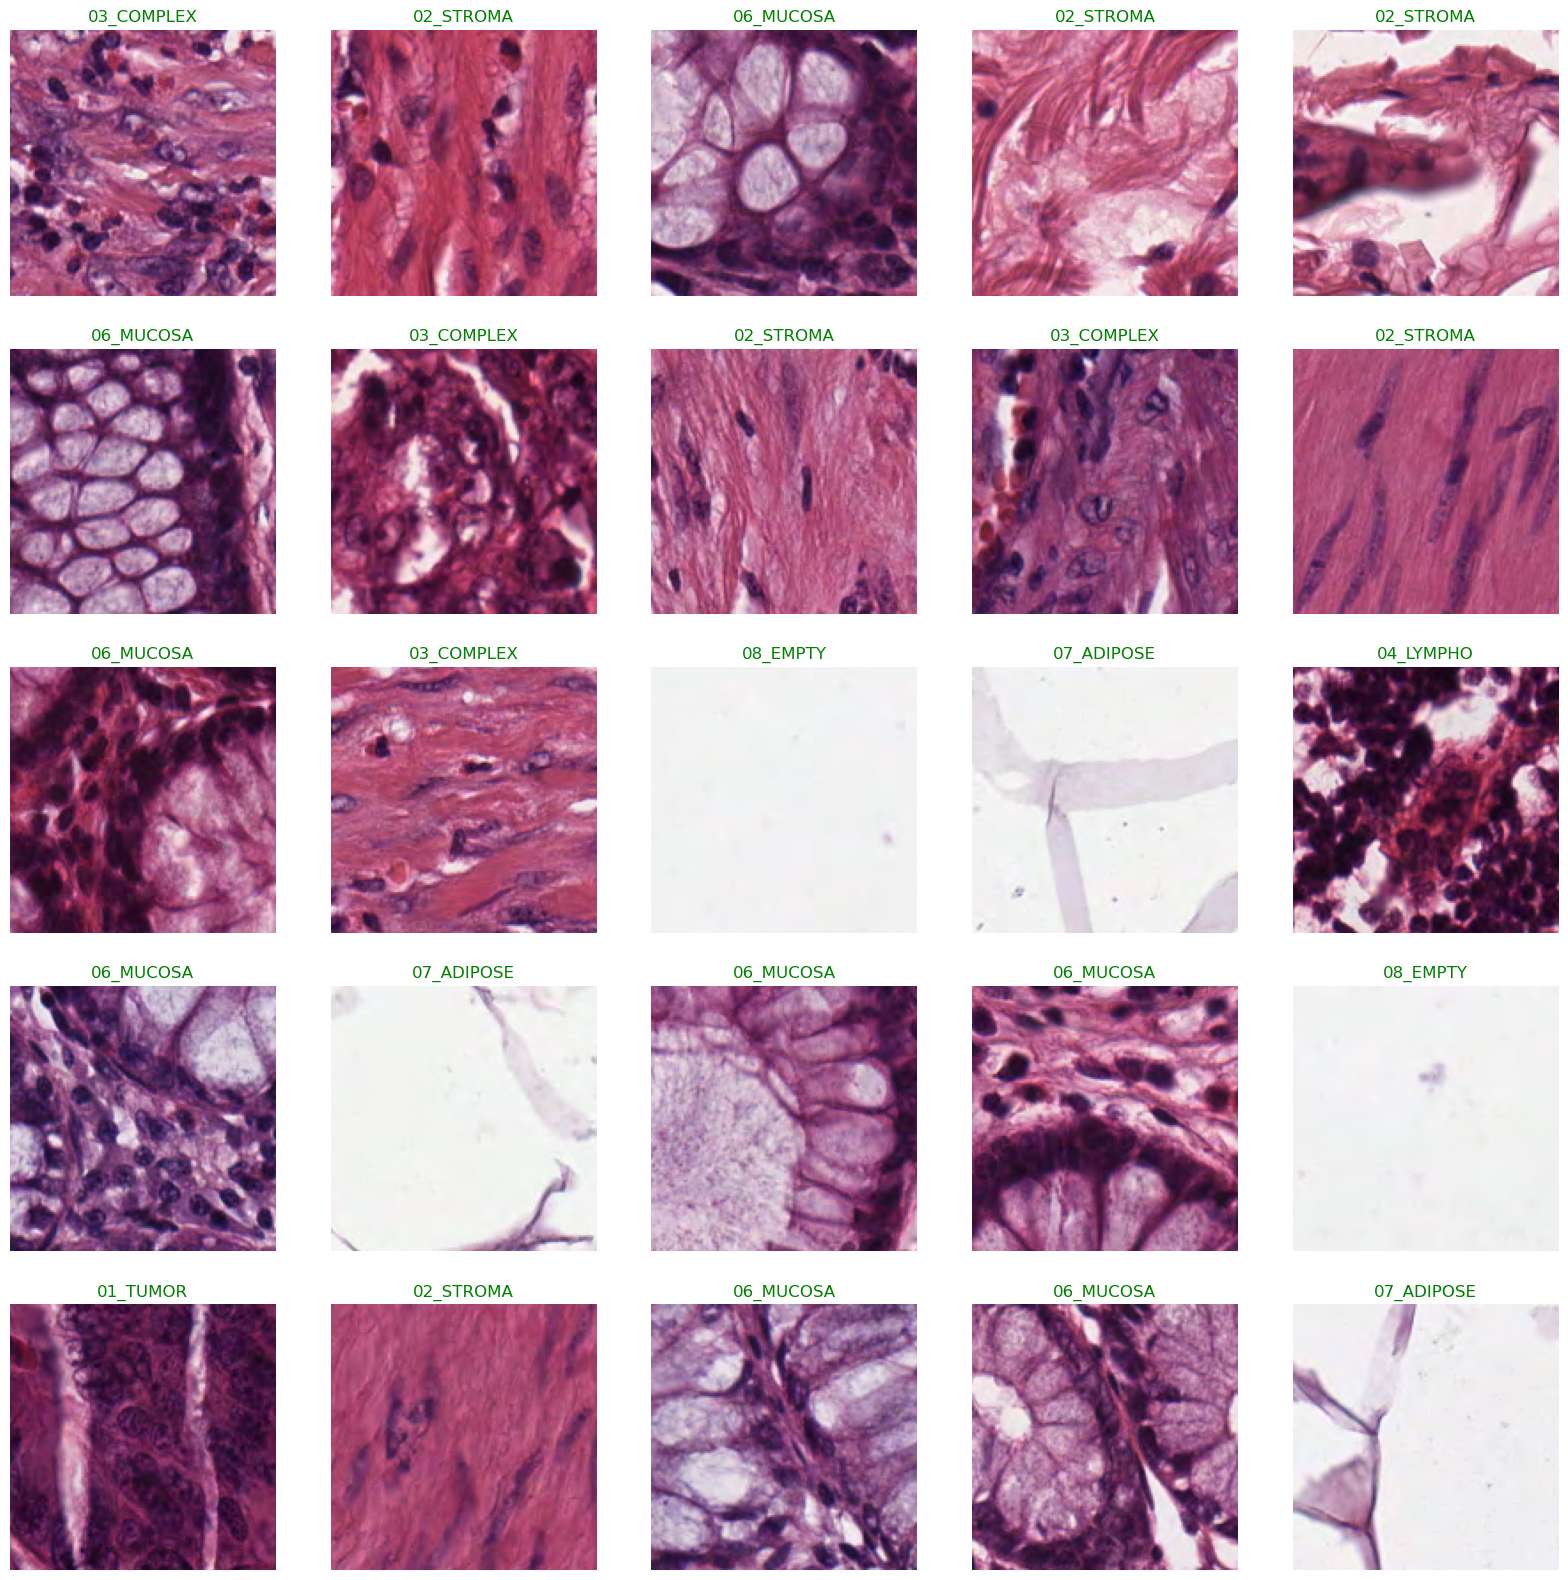

In [11]:
show_images(train_gen)

## **Model Architecture**

### **Keras Sequential Model with EfficientNetB4**

This segment of code is employed to construct a Sequential model in Keras, leveraging the pre-trained EfficientNetB4 as the foundational architecture, supplemented with a series of additional layers for enhanced customization.

In the realm of Keras, a Sequential model is an exemplar of a linear stack of layers wherein each layer has exactly one input tensor and one output tensor. This type of model is ideal for building simple architectures where there is a single input source, a single output destination, and the data flows through the layers in a linear fashion without any branching or skipping.

It provides a straightforward approach for model development by allowing the developer to design a model layer-by-layer. However, it is not suitable for more complex architectures that require multiple inputs/outputs or shared layers.

In this projects context, the pre-trained EfficientNetB4 model serves as the base layer for the Sequential model. The base model extracts complex features from the input images. These features are then passed on to the additional custom layers for further processing. The custom layers provide an interface to tailor the model according to the specific needs of the problem at hand.

- **Define Model Parameters**:
    - `img_size`: Sets the target size for the images to be `(150, 150)`.
    - `channels`: Specifies that the images have 3 color channels (RGB).
    - `img_shape`: Defines the input shape for the base model as `(150, 150, 3)`.
    - `class_count`: Counts the number of classes in the training data.

- **Initialize Base Model**:
    - `base_model`: Initializes the EfficientNetB4 model with pre-trained ImageNet weights. The model is set up without the top layer (`include_top = False`), with the specified image shape, and to use global max pooling.

- **Define Custom Model**:
    - `model`: Initializes a Sequential model which includes the base model and several additional layers:
        - `BatchNormalization`: Normalizes the activations of the previous layer at each batch.
        - `Dense`: A fully-connected layer with 256 units, ReLU activation function, and both L1 and L2 regularizers.
        - `Dropout`: Randomly sets a fraction of inputs to zero to prevent overfitting. The rate is set to 0.45 and the seed to 123 for reproducibility.
        - `Dense`: The output layer with a number of units equal to the number of classes, using the softmax activation function for multiclass classification.

- **Compile Model**:
    - The model is compiled with the Adamax optimizer, categorical cross-entropy loss function, and accuracy as a metric.

- **Summary**:
    - `model.summary()`: Prints a summary of the model's architecture.

In [12]:
img_size = (150, 150)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer


base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False,
                                                               weights = "imagenet",
                                                               input_shape = img_shape,
                                                               pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
          activity_regularizer = regularizers.l1(0.006),
                bias_regularizer = regularizers.l1(0.006),
           activation= 'relu'),
    Dropout(rate = 0.45, seed = 123),
    Dense(class_count, activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

71686520/71686520 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 batch_normalization (BatchN  (None, 1792)             7168      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 18,142,055
Trainable params: 18,013,264
Non

### **Plot Model Architecture**

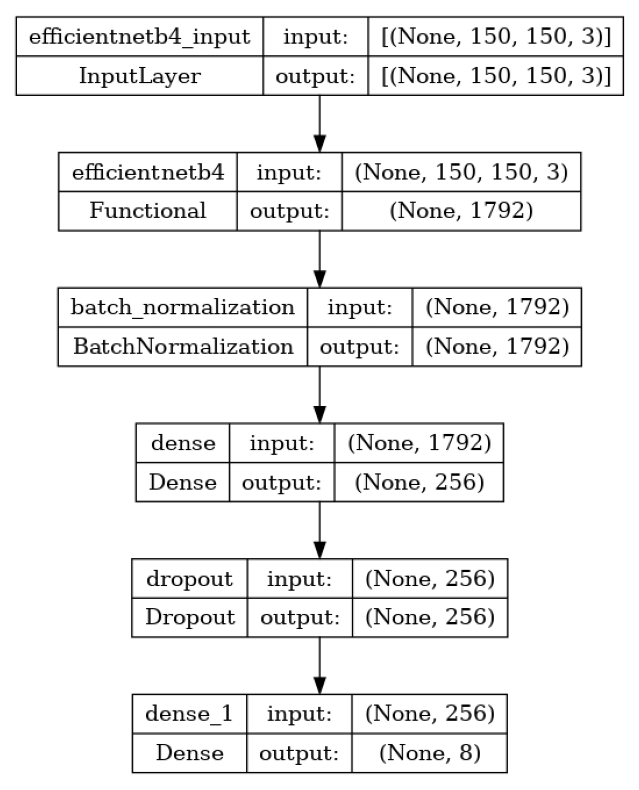

In [13]:
plot_model(model, show_shapes=True,
           show_layer_names=True,
           to_file='model_architecture.png')

image = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

### **Set the Baseline Callback Parameters**

The provided section of the code sets the stage for defining numerous hyperparameters pivotal to model training. Simultaneously, it also orchestrates a custom callback, offering a fertile ground for experimental pursuits.

Hyperparameters are the pre-set configurations that govern the training process. They can influence the model's performance significantly and may include aspects such as learning rate, batch size, number of layers, number of units per layer, and more.

Despite their importance, there is no "one-size-fits-all" set of hyperparameters that can guarantee the optimal performance across different problems. The efficacy of hyperparameters is heavily contingent on the nature of the data and the specific problem at hand. Hence, it is often necessary to experiment with different sets of hyperparameters to find the most suitable configuration for the task, a process known as hyperparameter tuning.

Adjusting the baseline hyperparameter values can provide valuable insights into their influence on model performance. Such experimental exploration can contribute towards enhancing the understanding of their role in model training and improving model performance.

The custom callback configured in this part of the code plays a vital role in monitoring the model's training process. By specifying the conditions under which the training should be modified or halted, the custom callback provides a way to further fine-tune the model and its training process.

- **Define Hyperparameters**:
    - `batch_size`: The number of samples per gradient update, set to 40.
    - `epochs`: Number of epochs to train the model, set to 40.
    - `patience`: The number of epochs with no improvement after which learning rate will be reduced, set to 1.
    - `stop_patience`: Number of epochs with no improvement after which training will be stopped, set to 3.
    - `threshold`: Metric threshold for switching monitoring metric, set to 0.9.
    - `factor`: Factor by which the learning rate will be reduced, set to 0.5.
    - `ask_epoch`: Epoch number to ask for early stopping, set to 5.
    - `batches`: The number of batches per epoch, calculated as the ceiling of the total number of training samples divided by the batch size.

- **Set Up Callbacks**:
    - `callbacks`: Initializes a list of callbacks to be used during training. In this case, it includes an instance of the `MyCallback` class, initialized with the model and the above hyperparameters.

In [14]:
batch_size = 32
epochs = 50
patience = 1
stop_patience = 3
threshold = 0.9
factor = 0.5
ask_epoch = 5
batches = int(np.ceil(len(train_gen.labels) / batch_size))

callbacks = [MyCallback(model = model, patience = patience,
                        stop_patience = stop_patience,
                        threshold = threshold, factor= factor,
                        batches = batches, epochs = epochs,
                        ask_epoch= ask_epoch )]

### **Train the Model**

This code is used to train a Keras model on the dataset provided by a generator.

- **Train Model**:
    - `history`: Calls the `fit` method on the `model` to train it for a specified number of epochs (`epochs`), using the specified training data generator (`train_gen`). The training process is configured with the following options:
        - `verbose = 0`: No output is generated for each epoch.
        - `callbacks = callbacks`: Uses the previously defined list of callbacks during training.
        - `validation_data = valid_gen`: Uses the specified validation data generator (`valid_gen`).
        - `validation_steps = None`: The number of steps that constitute an epoch for the validation generator is the total number of samples in the generator divided by the batch size.
        - `shuffle = False`: Does not shuffle the training data before each epoch.

- **Function Output**:
    - `history`: The History object generated by `fit()`. Its `History.history` attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values.


In [15]:
history = model.fit(x = train_gen, epochs = epochs, verbose = 0,
                    callbacks = callbacks, validation_data = valid_gen,
                    validation_steps = None, shuffle = False)

Notification to halt training [y/n]?


 n


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /50     7.307   78.343   6.18273  81.733   0.00100  0.00100  accuracy     0.00    79.81  
 2 /50     5.146   92.229   4.44263  92.133   0.00100  0.00100  val_loss    28.14    41.69  
 3 /50     3.852   95.286   3.35360  93.733   0.00100  0.00100  val_loss    24.51    42.83  
 4 /50     2.920   96.829   2.60351  94.267   0.00100  0.00100  val_loss    22.37    42.56  
 5 /50     2.239   97.829   2.03461  94.133   0.00100  0.00100  val_loss    21.85    42.62  
 6 /50     1.736   98.457   1.62698  94.267   0.00100  0.00100  val_loss    20.03    42.53  
 7 /50     1.359   98.800   1.30342  94.000   0.00100  0.00100  val_loss    19.89    42.70  
 8 /50     1.076   98.686   1.05225  94.667   0.00100  0.00100  val_loss    19.27    42.97  
 9 /50     0.863   98.886   0.86255  94.933   0.00100  0.00100  val_loss    18.03    42.65  
10 /50     0.687   99.429   0.71811  94.933   0.00100  0.00100  val_los

### **Plot Model Performance**

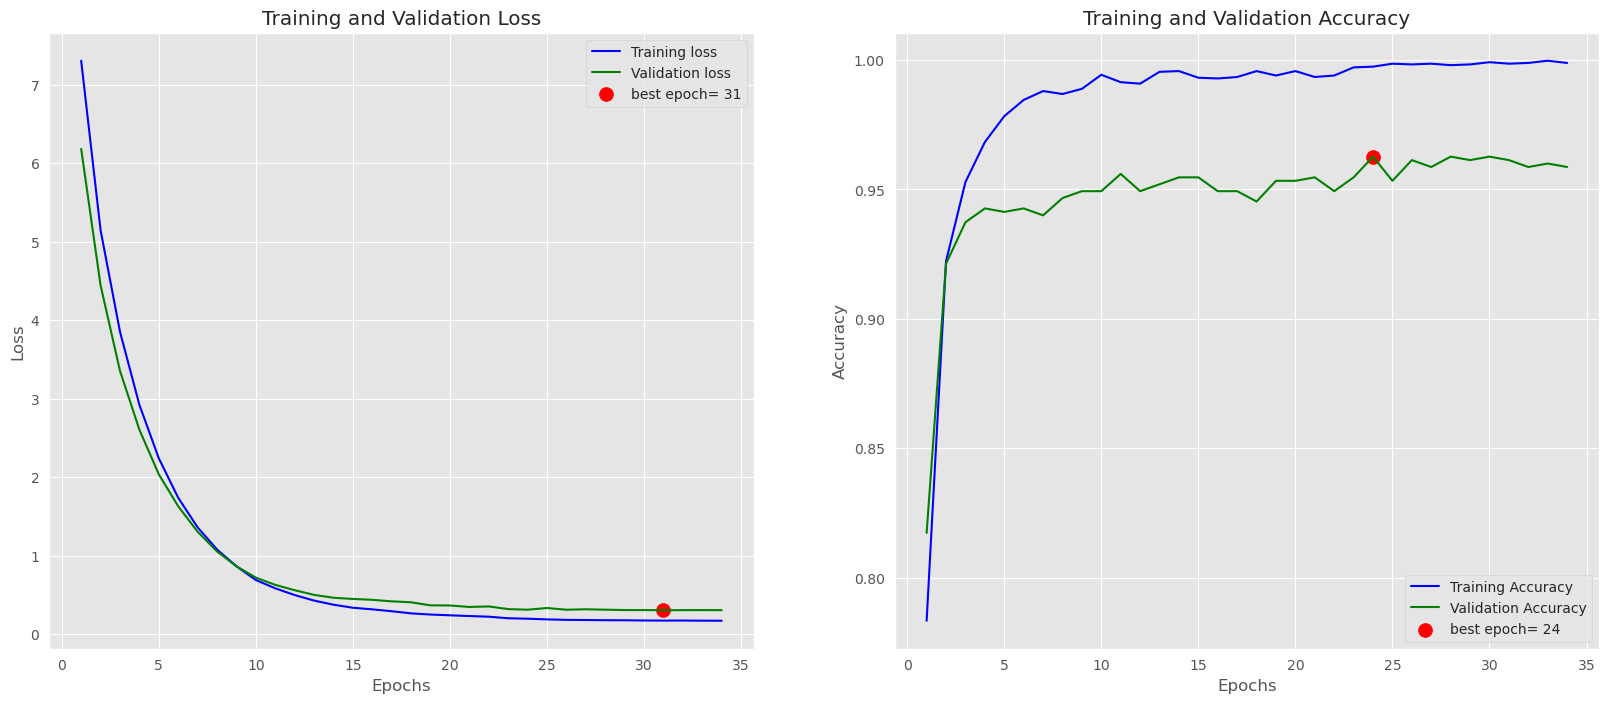

In [16]:
plot_training(history)

### **Model Evaluation**

This code is used to evaluate a trained Keras model on the training, validation, and test sets.

- **Calculate Test Batch Size**:
    - `ts_length`: The total number of samples in the test set.
    - `test_batch_size`: Finds the highest factor of `ts_length` that is less than or equal to 80 to be the batch size for testing.
    - `test_steps`: The number of steps that constitute an epoch for the test generator, calculated as `ts_length // test_batch_size`.

- **Evaluate Model**:
    - `train_score`: Evaluates the model on the training data generator (`train_gen`), using the calculated number of `test_steps`.
    - `valid_score`: Evaluates the model on the validation data generator (`valid_gen`), using the calculated number of `test_steps`.
    - `test_score`: Evaluates the model on the test data generator (`test_gen`), using the calculated number of `test_steps`.

- **Print Evaluation Scores**:
    - Prints the loss (index 0) and accuracy (index 1) of the model on the training, validation, and test sets.


In [17]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps = test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps = test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps = test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

10/10 [==============================] - 7s 551ms/step - loss: 0.2960 - accuracy: 0.9587
Train Loss:  0.146177276968956
Train Accuracy:  1.0
--------------------
Validation Loss:  0.3226858377456665
Validation Accuracy:  0.9524999856948853
--------------------
Test Loss:  0.29602423310279846
Test Accuracy:  0.9586666822433472


### **Produce Predictions**

In [18]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[5 4 3 6 2 1 0 0 4 2 7 3 0 2 0 7 4 0 6 2 0 2 3 3 4 4 1 7 1 2 2 1 3 4 2 7 4
 3 0 7 2 4 1 7 7 6 6 6 6 3 1 7 1 7 5 0 2 1 6 5 4 6 5 5 1 3 4 2 0 1 6 2 4 6
 1 7 4 6 4 7 5 6 6 6 2 3 1 5 2 0 0 2 4 2 1 3 5 5 5 2 5 4 6 1 7 3 7 1 4 6 6
 1 2 5 7 0 1 2 2 1 0 0 3 2 3 7 0 3 0 7 4 0 6 3 0 7 6 6 3 3 6 3 1 6 7 4 4 0
 6 2 3 5 2 2 5 0 0 7 5 1 4 4 3 5 0 4 3 6 1 7 5 3 4 4 6 6 3 7 2 2 4 7 2 2 3
 2 0 3 3 2 0 4 4 5 7 0 3 7 7 4 6 7 4 4 1 3 2 3 1 2 3 1 6 7 7 6 3 2 0 0 0 0
 7 6 6 1 1 2 6 5 6 7 3 5 5 0 3 1 4 7 1 6 5 2 5 4 4 4 4 1 3 3 2 0 1 0 6 6 7
 4 4 5 0 4 3 6 5 1 5 7 0 5 1 1 6 3 1 7 0 5 0 6 7 3 4 4 2 7 7 4 1 3 5 0 0 7
 4 6 5 5 6 2 6 2 6 0 2 1 4 4 3 1 5 5 3 5 6 3 5 0 5 3 4 2 1 1 1 7 4 0 4 1 0
 3 7 2 4 7 6 7 3 7 2 0 0 1 2 7 0 2 5 3 1 1 0 0 7 0 4 7 5 4 3 4 7 3 4 4 0 5
 3 3 4 3 1 4 5 3 3 1 7 3 1 2 4 2 3 4 5 4 6 7 3 3 0 1 5 1 2 5 4 5 6 6 2 5 6
 4 4 5 7 2 4 5 4 6 2 5 1 1 6 0 4 5 0 4 1 7 7 3 5 1 0 1 5 3 0 2 5 7 0 5 6 3
 7 6 0 2 5 0 2 3 4 7 1 1 3 5 7 7 3 7 5 7 6 2 7 1 1 1 1 2 6 6 7 2 5 6 7 6 1
 3 0 5 5 3 2 0 2 5 3 3 6 

### **Build the Confusion Matrix and Classification Report**

This code is used to generate and display a confusion matrix and classification report for the model's predictions on the test set.

- **Extract Class Labels**:
    - `g_dict`: Gets a dictionary mapping class labels to their corresponding integer indices from the test generator.
    - `classes`: A list of class labels.

- **Generate and Plot Confusion Matrix**:
    - `cm`: Calculates the confusion matrix using the true labels from the test generator and the predicted labels (`y_pred`).
    - `plot_confusion_matrix()`: Calls the previously defined `plot_confusion_matrix` function to plot the confusion matrix with class labels.

- **Generate and Print Classification Report**:
    - `classification_report()`: Generates a classification report that includes metrics like precision, recall, f1-score, and support for each class.
    - `print()`: Prints the classification report.

- **Function Output**:
    - The code snippet does not directly return anything. It generates a visual representation of the confusion matrix and prints a classification report.

Confusion Matrix, Without Normalization
[[89  0  2  2  0  0  0  0]
 [ 0 88  5  0  1  0  0  0]
 [ 2  5 86  1  0  0  0  0]
 [ 0  2  2 90  0  0  0  0]
 [ 0  1  2  0 91  0  0  0]
 [ 0  0  0  1  0 93  0  0]
 [ 0  0  0  0  2  0 89  3]
 [ 0  0  0  0  0  0  0 93]]
              precision    recall  f1-score   support

    01_TUMOR       0.98      0.96      0.97        93
   02_STROMA       0.92      0.94      0.93        94
  03_COMPLEX       0.89      0.91      0.90        94
   04_LYMPHO       0.96      0.96      0.96        94
   05_DEBRIS       0.97      0.97      0.97        94
   06_MUCOSA       1.00      0.99      0.99        94
  07_ADIPOSE       1.00      0.95      0.97        94
    08_EMPTY       0.97      1.00      0.98        93

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



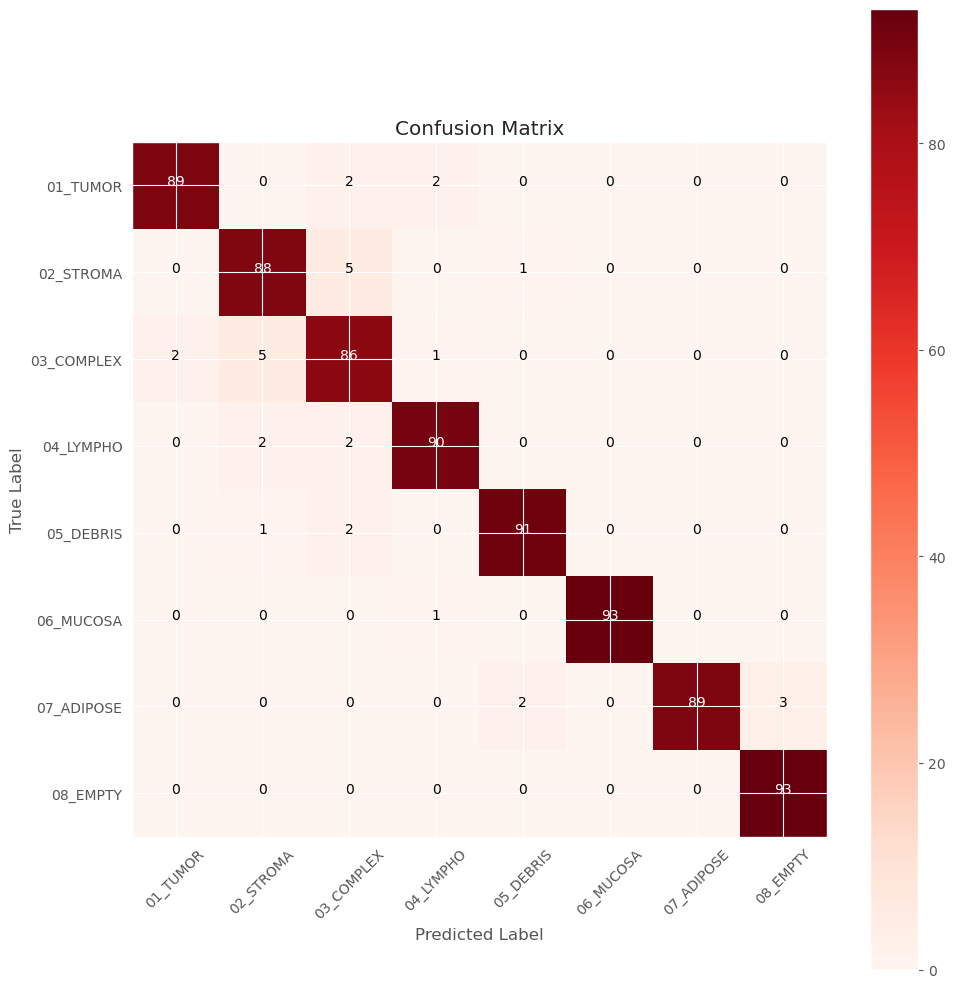

In [19]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm = cm, classes = classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names = classes))

- **Precision**: Precision, also called Positive Predictive Value, is a measure of a classifier's exactness. It is defined as the number of true positives divided by the total number of elements labeled as belonging to the positive class.

    - Mathematical formula for precision:
    
\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}
        

- **Recall**: Recall, also called Sensitivity, Hit Rate, or True Positive Rate, is a measure of a classifier's completeness. It is defined as the number of true positives divided by the total number of elements that actually belong to the positive class.

    - Mathematical formula for recall:

\begin{align}
Recall = \frac{TP}{TP + FN}
\end{align}

- **F1-Score**: The F1 score is the harmonic mean of precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

    - Mathematical formula for F1-score:

\begin{align}
F1 = \frac{2 * Precision + Recall}{Precision + Recall} = \frac{2 * TP}{2 * TP + FP + FN}
\end{align}


- **Support**: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

# **Summary**

Colorectal cancer ranks among the most prevalent malignancies globally. The exigency of effective diagnostic measures is paramount to enhance patient prognosis. Conventionally, histopathological examination forms a critical component of the diagnostic workflow. However, this methodology is labor-intensive, time-consuming, and inherently dependent on the pathologist's expertise.

In response to these challenges, this project embarked on the development of a deep learning model to augment the diagnostic process of colorectal cancer. This objective was pursued within the emerging field of digital pathology, where histological slides are digitized, resulting in an expansive dataset amenable to computational analysis.

The project hinged on the EfficientNetB4 model as the foundational architecture for the image classification task. This deep learning model, bolstered with additional dense layers, batch normalization, and dropout mechanisms, explores the morphological traits pivotal to histopathological diagnosis of colorectal cancer. The model was compiled employing the Adamax optimization algorithm, with a learning objective characterized by categorical cross-entropy loss function.

## **Evaluation Metrics:**

- Precision: 0.96
- Recall: 0.96
- F1-Score: 0.96
- Support: 750

Upon evaluation, the model exhibited compelling performance metrics, boasting a precision, recall, and F1 score, all quantifying at 0.96. These collective metrics underscore the model's competency in effectively classifying histological images, attesting to its accuracy and robustness across the diverse classes. This evidences the transformative potential of machine learning technologies in augmenting traditional diagnostic workflows, thereby accelerating diagnostic processes and potentially enhancing diagnostic precision.

# Future Work and Conclusion

Future iterations of this project could explore advanced avenues to enhance the model's performance. This could potentially involve meticulous hyperparameter tuning and the incorporation of diverse data augmentation strategies. These methods stand to improve the model's capacity to generalize from the training data, thereby increasing its prediction accuracy on unseen histological images.

In conclusion, this project underscores the transformative potential of deep learning integration within the realm of digital pathology. It demonstrates a pathway towards streamlining cancer diagnostics, optimizing accuracy, and expediting the overall process. These enhancements collectively stand to improve patient prognosis, thereby underscoring the profound societal implications of machine learning technologies in healthcare.